## Import libraries
#


In [1]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Machine Learning packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import classification_report
import utils

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables
import re
import unicodedata

import pandas as pd
import pickle
from scipy import sparse
import numpy as np
import scipy
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings

from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.feature_extraction import text as text_extraction
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import sys
import traceback
from sklearn.cluster import MiniBatchKMeans
from sklearn import preprocessing


import string
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout
from tensorflow.keras import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from  keras.layers import Flatten

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dvieiralopes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load data

In [2]:
df = pd.read_csv('mbti_1.csv')
#get the shape of your raw data
print('shape of the raw data',df.shape)
print('name of the columns',df.columns)

column='posts'
df.head()

shape of the raw data (8675, 2)
name of the columns Index(['type', 'posts'], dtype='object')


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


## Missing values

In [3]:
df.isnull().sum()

type     0
posts    0
dtype: int64

## Cleaning

In [4]:
def cleaning(df, remove_special=True):
    texts = df['posts'].copy()
    labels = df['type'].copy()

    #delete the websites and links
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))

     #keep the information of end of sentences
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\.', '  tokendot ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\?', ' tokenquestion ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'!', ' tokenexs ', x + " "))

    #strip puctuation
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    #remove multiple fullstops
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    #remove Non-words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #convert posts to lowercase
    df["posts"] = df["posts"].apply(lambda x: x.lower())

    #remove multiple letter repeating words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    #remove very short or long words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    #Remove the words of mbti 
    if remove_special:
        pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
        pers_types = [p.lower() for p in pers_types]
        p = re.compile("(" + "|".join(pers_types) + ")")

    return df

clean_df = cleaning(df)

## Analysis

In [5]:
clean_df.posts[1200]

'  your time travel  raise   hououin kyouma tokenexs   buahahahaha tokenexs   watched  animesubbed  loved   tokendot      glad this thread came back  life  tokendot    migrated over   witcher replaying  prep  witcher  back    skyrimgot  bunch   mods saints   thirdso amazing   tokendot   tokendot   tokendot     bunch  people already  here  tokenquestion     spends  minutes desperately looking   wallet which  just      down somewhere  tokendot   then  look down   right hand  tokendot     holding  wallet  tokendot   sometimes someone will   tokendot   tokendot   tokendot    harrison ford  tokendot crazy     best   send lucas  spielberg  message after shoehorning ancient aliens into  indiana jones franchise  tokendot       think  know where this  heading  tokendot      interneting correctly right tokenquestion      what tokenquestion     hasnt been  probably wont  released   consoles  tokendot   anyways this kind  dumbing down  largely  result  people  high positions   corporate ladder mak

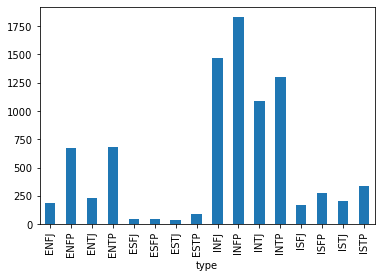

In [6]:
fig = plt.figure(figsize=(6,4))
clean_df.groupby('type').posts.count().plot.bar(ylim=0)
plt.show()

"""Each user use the social media in a different way posting more or less , analysing the quantity of posts per user we have this the description bellow. Also in the boxplot is clean it has many outliers and the max is 50 posts per person"""

##### check the quantity of posts 

In [10]:

def reg_find(reg, replace, phrase):
    if re.findall(reg, phrase) is not None:
        phrase = re.sub(reg, replace, phrase)
    return phrase
    
def add_regex(data,column):
    """remove or change strings as necessary"""
    pattern=r"((https*://|www|http*://)(.*?)[\s+\n])"
    data[column+'_first_clean']= data[column].apply(lambda x: reg_find(pattern, r'', x))
    pattern = r'[0-9]|perc|'
    return data
column= 'posts'
df = pd.read_csv('mbti_1.csv')
# first clean only the posts columns deleting the https and numbers using regex
df=add_regex(df,column)
#second create a new column spliting the comments as different strings
# Each row has many sentences from different platforms, that is why is better to split to have more information to extract
df[column+'_second_clean_str']=df[column+'_first_clean'].apply(lambda x: x.strip().split('|||'))
df['quantity_posts'] = df[column+'_second_clean_str'].apply(lambda x: len(x))

df[['quantity_posts']].describe()

,quantity_posts
count,8675.000000
mean,46.731066
std,6.608398
min,1.000000
25%,46.000000
50%,49.000000
75%,50.000000
max,89.000000


<AxesSubplot:>

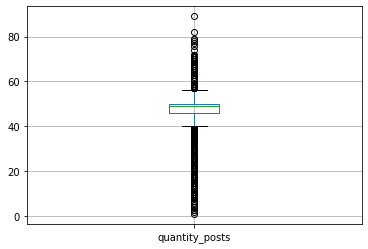

In [11]:
df.boxplot('quantity_posts')

<AxesSubplot:ylabel='Frequency'>

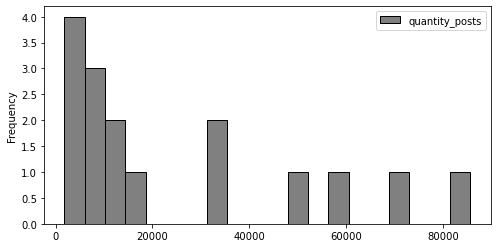

In [13]:
### Frequency in the quantity of posts
grouped=df.groupby(['type'])['quantity_posts'].sum().reset_index()

grouped.plot(kind='hist', 
                      bins=20, figsize=(8,4), 
                      facecolor='grey',edgecolor='black')

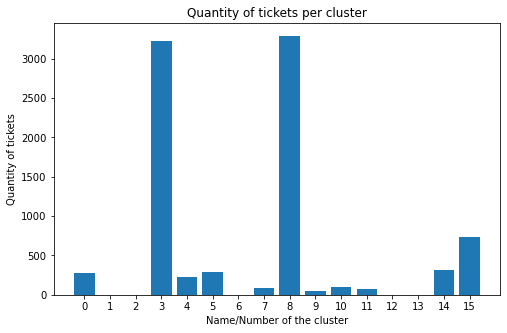

In [14]:
vectorizer = TfidfVectorizer(ngram_range=(1,1),max_features=500)
X_cluster = vectorizer.fit_transform(clean_df['posts'])
    
clusters =utils.get_clusters_kmeans(X_cluster,len(df.type.drop_duplicates()))
utils.bar_split_text_per_clusters(clusters,clean_df,'posts')

<AxesSubplot:>

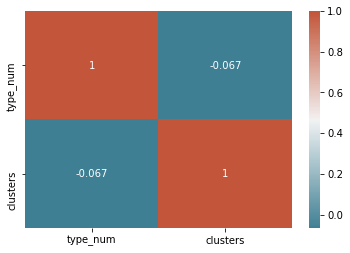

In [16]:
# calculate correlation matrix
label_encoder = preprocessing.LabelEncoder()
clean_df['type_num']= label_encoder.fit_transform(clean_df['type'])
corr = clean_df[['type_num','clusters']].corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [18]:
#remove post with lesss than a quantity of words
min_words = 15
clean_df["no. of. words"] = clean_df["posts"].apply(lambda x: len(re.findall(r'\w+', x)))
clean_df = clean_df[clean_df["no. of. words"] >= min_words]

## Feature engineering

In [19]:
## after try with some different features as quantoty of post, quantity of words, etc it was chose to use only the vectorizers 

### preparing x and y

In [20]:
enc = LabelEncoder()
clean_df['type of encoding'] = enc.fit_transform(clean_df['type'])

target = clean_df['type of encoding'] 

### vectorizer

In [21]:
vect = CountVectorizer(stop_words='english',max_features=5000) 
train =  vect.fit_transform(clean_df["posts"])

In [22]:
len(vect.get_feature_names())

5000

## training

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, stratify=target, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(5079, 5000) (5079,) (3387, 5000) (3387,)


In [34]:
data_list  = clean_df[['type','type of encoding']].drop_duplicates().sort_values('type of encoding')
list_name_target = data_list['type'].tolist()
list_number_target = data_list['type of encoding'].tolist()

### model random forest

In [35]:
accuracies = {}

#Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state = 1)
random_forest.fit(X_train, y_train)

# make predictions for test data
Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracies['Random Forest'] = accuracy* 100.0 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 49.54%


In [36]:
target_names=[str(x) for x in list_name_target]

print(classification_report(y_test, Y_pred, target_names=target_names))
#maybe it would be better to change the threshold in the classification report as the data is not balanced 

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        73
        ENFP       0.64      0.17      0.27       256
        ENTJ       1.00      0.02      0.04        90
        ENTP       0.67      0.32      0.44       267
        ESFJ       0.00      0.00      0.00        17
        ESFP       0.00      0.00      0.00        19
        ESTJ       0.00      0.00      0.00        15
        ESTP       0.00      0.00      0.00        35
        INFJ       0.50      0.64      0.56       575
        INFP       0.41      0.86      0.56       711
        INTJ       0.60      0.49      0.54       430
        INTP       0.57      0.62      0.60       514
        ISFJ       0.00      0.00      0.00        66
        ISFP       0.44      0.04      0.07       107
        ISTJ       1.00      0.04      0.07        81
        ISTP       0.76      0.21      0.33       131

    accuracy                           0.50      3387
   macro avg       0.41   

### xg boost

In [37]:
#XG boost Classifier
xgb = XGBClassifier(max_depth=5,n_estimators=50,learning_rate=0.1)
xgb.fit(X_train,y_train)

Y_pred = xgb.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracies['XG Boost'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[14:16:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 58.67%


In [38]:
target_names=[str(x) for x in list_name_target]

print(classification_report(y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

        ENFJ       0.50      0.21      0.29        73
        ENFP       0.57      0.43      0.49       256
        ENTJ       0.66      0.28      0.39        90
        ENTP       0.58      0.49      0.53       267
        ESFJ       1.00      0.06      0.11        17
        ESFP       0.00      0.00      0.00        19
        ESTJ       0.20      0.07      0.10        15
        ESTP       0.62      0.14      0.23        35
        INFJ       0.60      0.65      0.62       575
        INFP       0.53      0.77      0.63       711
        INTJ       0.62      0.64      0.63       430
        INTP       0.63      0.67      0.65       514
        ISFJ       0.58      0.32      0.41        66
        ISFP       0.58      0.36      0.44       107
        ISTJ       0.61      0.33      0.43        81
        ISTP       0.71      0.54      0.61       131

    accuracy                           0.59      3387
   macro avg       0.56   

## Using 4 classes

In [39]:
data = pd.read_csv('mbti_1.csv')

In [40]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found') 
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

data = data.join(data.apply (lambda row: get_types (row),axis=1))

In [41]:
data.head(4)

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1


#### preprocessing more simple

In [42]:
lemmatiser = WordNetLemmatizer()

# Remove the stop words for speed 
useless_words = stopwords.words("english")

# Remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

In [43]:
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    return [b_Pers[l] for l in personality]

#To show result output for personality prediction
def translate_back(personality):
    # transform binary vector to mbti personality
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.type])


In [44]:
def cleaning(data, remove_stop_words=True, remove_mbti_profiles=True):
    list_personality = []
    list_posts = []
    len_data = len(data)
    i=0
  
    for row in data.iterrows():
        #Remove and clean comments
        posts = row[1].posts

        #Remove url links 
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)

        #Remove Non-words - keep only words
        temp = re.sub("[^a-zA-Z]", " ", temp)

        # Remove spaces > 1
        temp = re.sub(' +', ' ', temp).lower()

        #Remove multiple letter repeating words
        temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)

        #Remove stop words
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])

        #Remove the classes words 
        if remove_mbti_profiles:
            for t in unique_type_list:
                temp = temp.replace(t,"")

        # transform mbti to binary vector
        type_labelized = translate_personality(row[1].type) #or use lab_encoder.transform([row[1].type])[0]
        list_personality.append(type_labelized)
        # the cleaned data temp is passed here
        list_posts.append(temp)

    # returns the result
    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

list_posts, list_personality  = cleaning(data, remove_stop_words=True, remove_mbti_profiles=True)


In [45]:
len(list_posts)

8675

### Feature engineering

In [46]:
# Vectorizing the database posts to a matrix of token counts for the model
cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000) 
# the feature should be made of word n-gram 
# Learn the vocabulary dictionary and return term-document matrix
X_cnt = cntizer.fit_transform(list_posts)

#The enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
feature_names = list(enumerate(cntizer.get_feature_names()))
# print(feature_names[0:10])

In [47]:
tfizer = TfidfTransformer()

X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)

(8675, 1000)


#### preparing x and y for 4 classes

In [48]:
personality_type = [ "IE: Introverts (I) / Extroverts (E)", "NS: Intuitives (N) / Sensors (S)", 
                   "FT: Feelers (F) / Thinkers (T)", "JP: Judgers (J) / Perceivers (P)"  ]


In [49]:
X = X_tfidf

## training 

In [50]:
#XGBoost model for MBTI dataset 
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))
    target_names=[str(x) for x in range(0,2)]
    print(classification_report(y_test, y_pred, target_names=target_names))

[14:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
IE: Introverts (I) / Extroverts (E) Accuracy: 76.28%
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      2229
           1       0.38      0.11      0.17       634

    accuracy                           0.76      2863
   macro avg       0.58      0.53      0.52      2863
weighted avg       0.70      0.76      0.71      2863

[14:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
